## Titanic Survival Prediction

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data



#### Variables:

Pclass: Passenger's socio-economic status

Name: Passenger's name

Sex: Passenger's sex

Age: This can also be fractional

SibSp: The number of siblings and spouse of the passenger

Parch: Indicates whether the passenger's parents or children were aboard as well

Ticket: Passenger's ticket number

Fare: Ticket fare

Cabin: Passenger's Cabin number

Embarked: Passenger's point of embarkment


In [52]:
df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data PreProcessing

In [53]:
for col in df.columns:
    val = df[col].isnull().sum()
    if val != 0:
        print(col,' has ', val,' null values')


Age  has  177  null values
Cabin  has  687  null values
Embarked  has  2  null values


In [54]:
#Dropping Columns that have no relevance to survival: Ticket, PassengerId, Cabin and Name

df.drop(columns = ['Ticket','PassengerId','Name','Cabin'],inplace=True) 
df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Dealing with missing values

#### Embarked


In [55]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


#### Age

<Axes: title={'center': 'Age Distribution'}, ylabel='Density'>

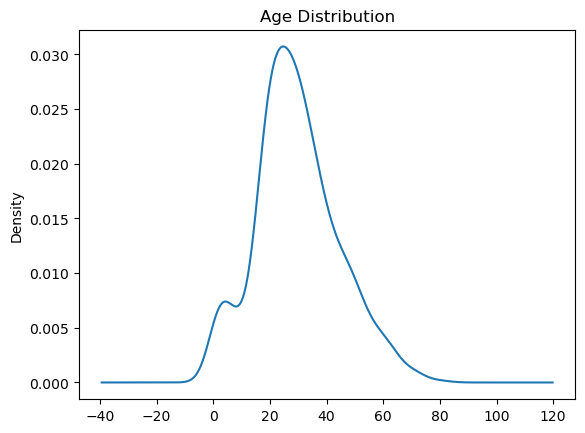

In [56]:
df['Age'].plot(kind='density',title='Age Distribution')

In [57]:
#From the distribution we can infer that it would be apt to replace the nan values in the Age 
#column with the median values

df['Age'].fillna(df['Age'].median(),inplace=True)

In [58]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [59]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

All the missing values have been dealt with 👍

### Replacing the Categorical variables with a numerical value

In [60]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])


In [63]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


<Axes: title={'center': 'Sex distribution'}, xlabel='Sex'>

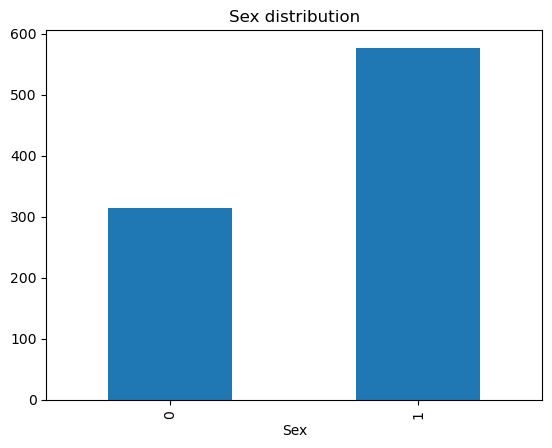

In [62]:
temp = df.groupby(['Sex'])['Sex'].count()
temp.plot(kind='bar',title='Sex distribution')

<Axes: title={'center': 'Embarking Position distribution'}, xlabel='Embarked'>

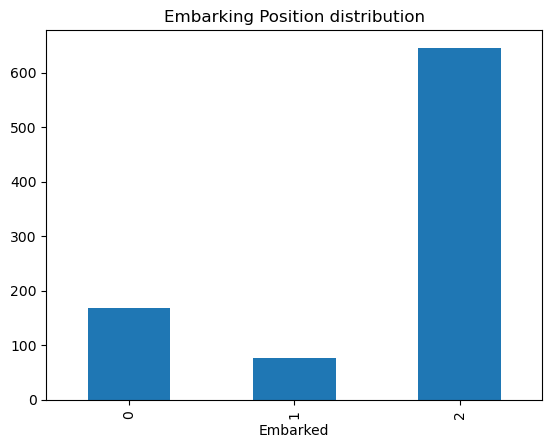

In [64]:
temp = df.groupby(['Embarked'])['Embarked'].count()
temp.plot(kind='bar',title='Embarking Position distribution')

In [98]:
df = pd.get_dummies(df,columns=['Embarked'])

In [99]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


## Data Analysis

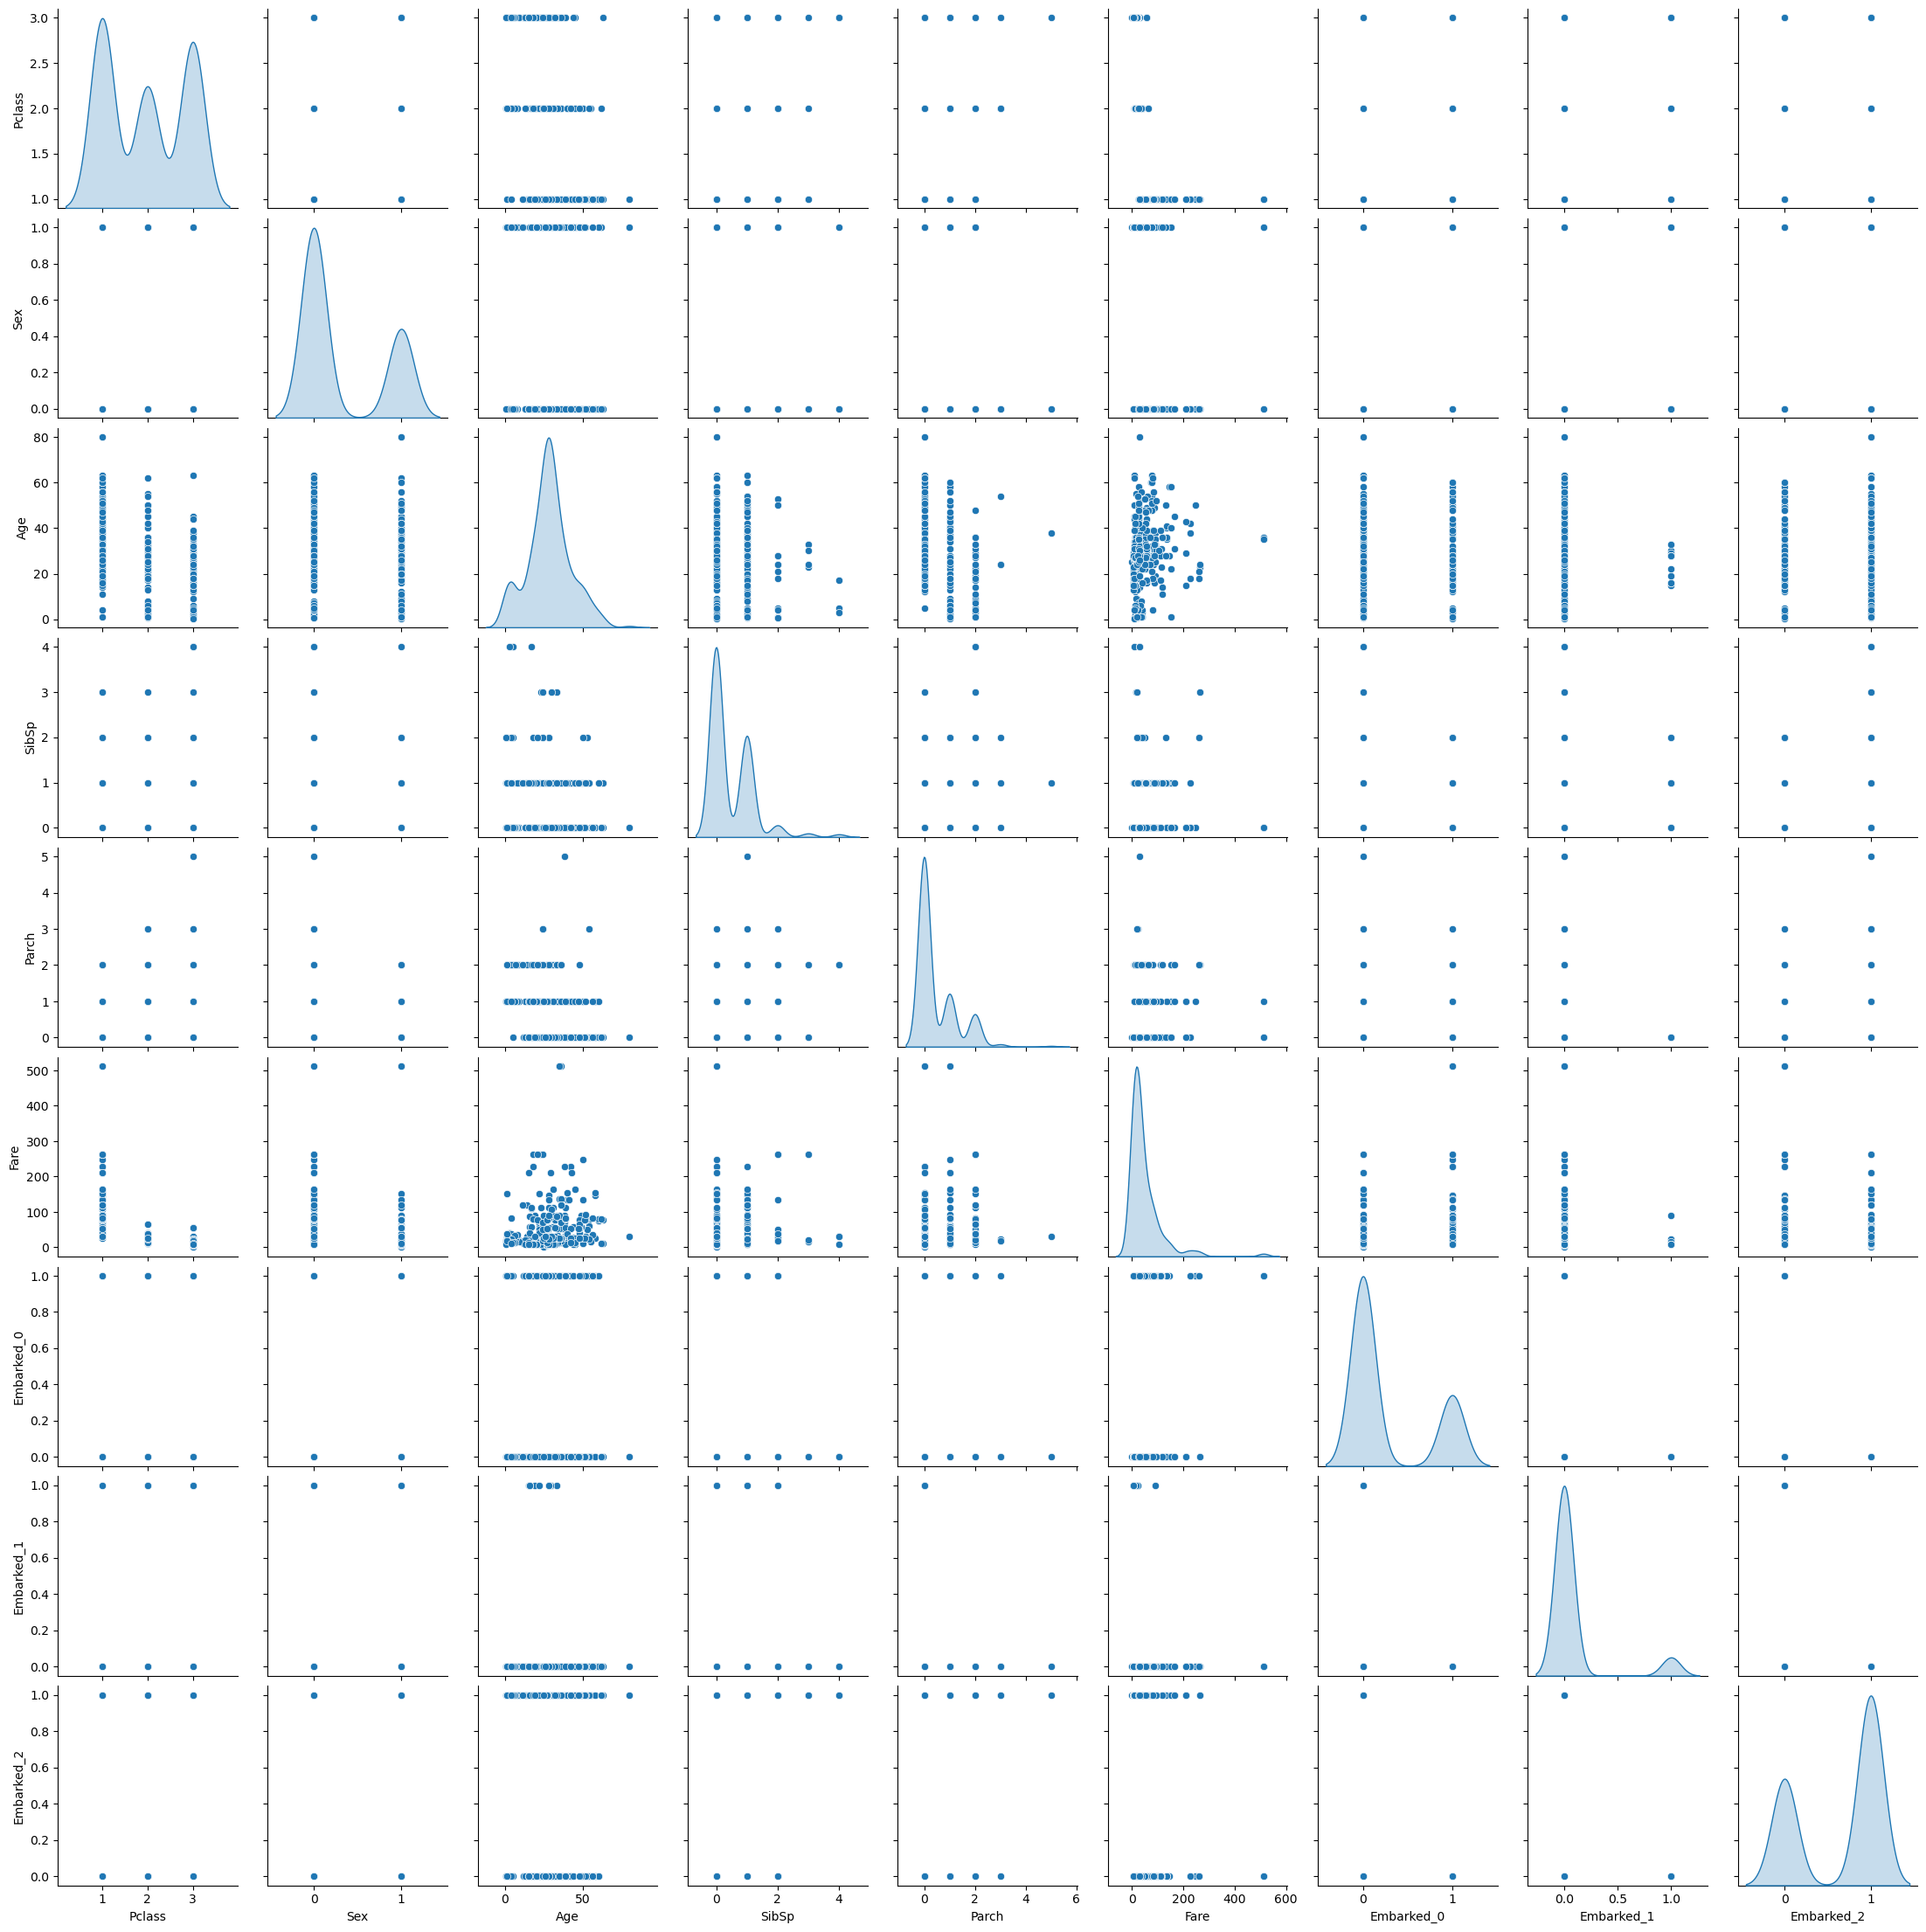

In [100]:
#Visualizing relationships between the different predictor variables

sns.pairplot(df[df['Survived'] == 1].drop(['Survived'],axis=1),diag_kind='kde');

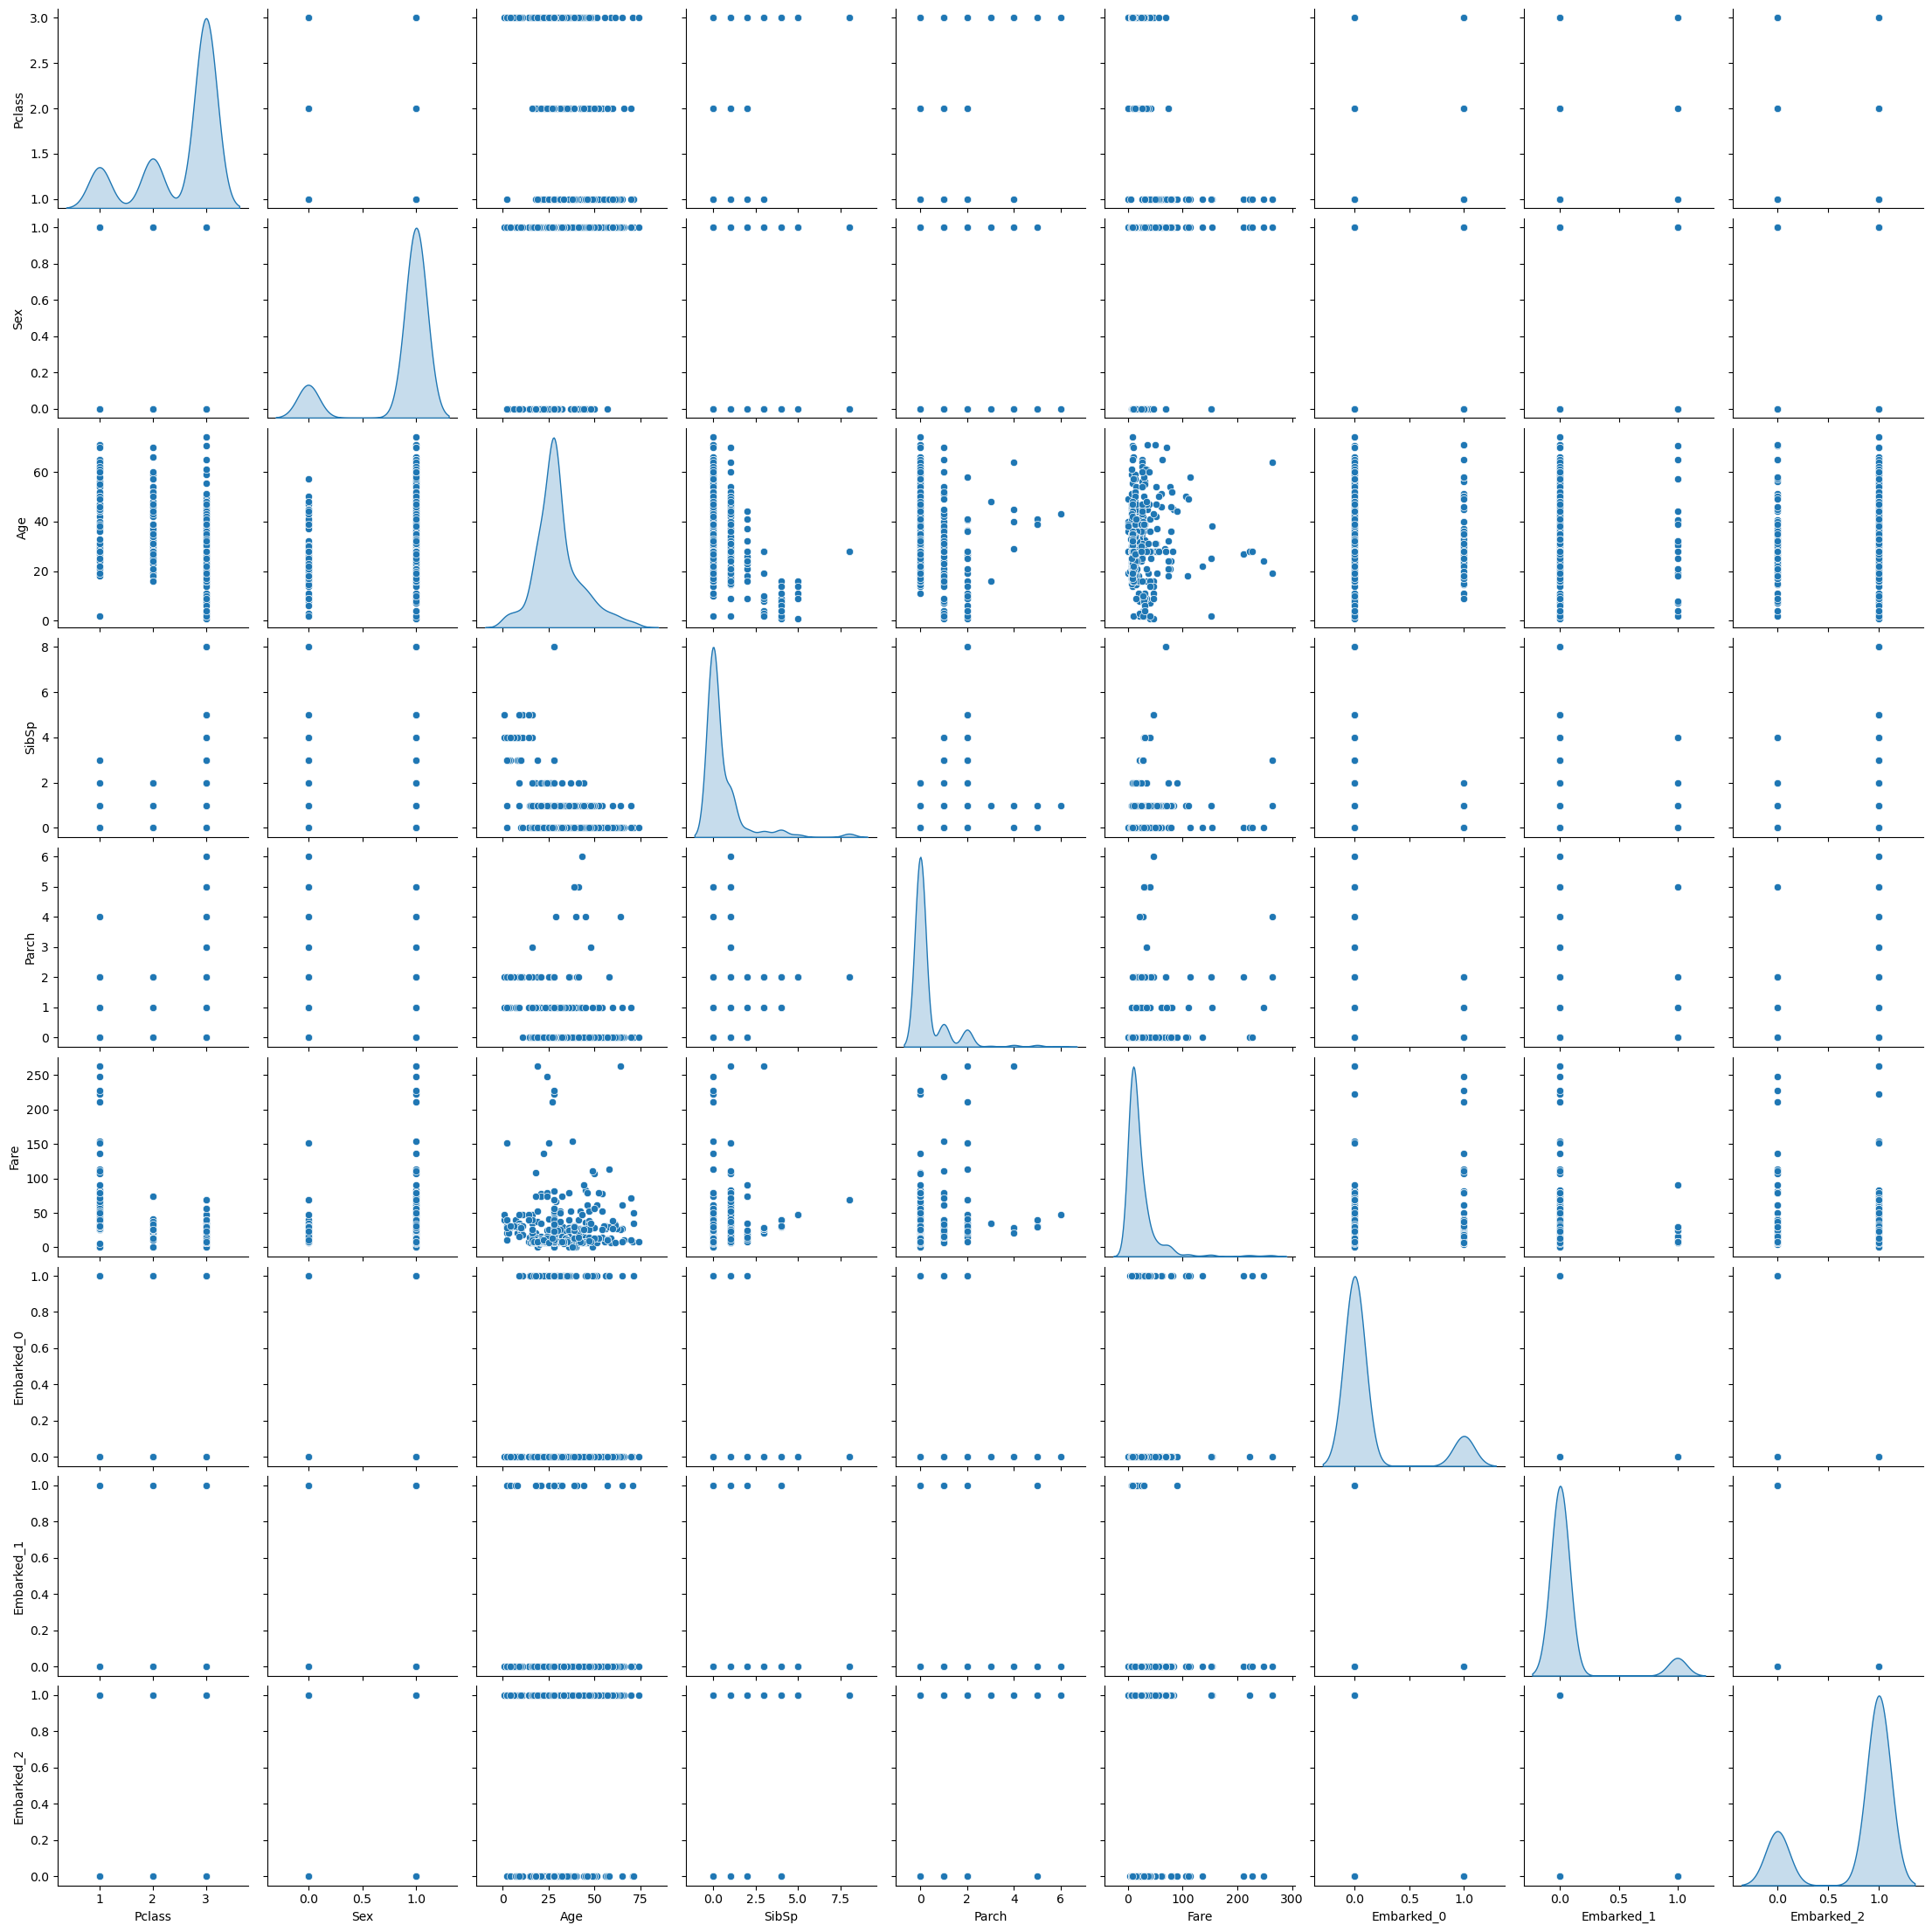

In [101]:
sns.pairplot(df[df['Survived'] == 0].drop(['Survived'],axis=1),diag_kind='kde');

In [102]:
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
Embarked_0,0.168240,-0.243292,-0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Embarked_1,0.003650,0.221009,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421
Embarked_2,-0.149683,0.074053,0.119224,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000


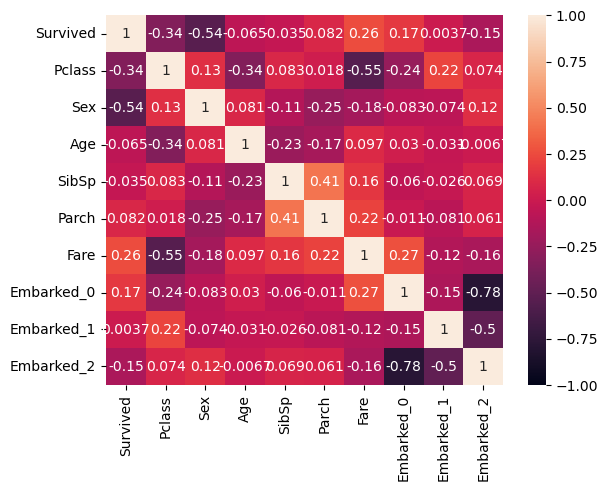

In [103]:
sns.heatmap(corr,annot=True,vmin=-1,vmax=1);

From the above plots, we can easily infer that the Survival variable depends strongly on Pclass and Sex, and less strongly on Fare and Embarked. The other variables while not as relevant can't be ignored except for Embarked_1

In [104]:
df.drop(columns=['Embarked_1'],inplace=True)

In [105]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_2
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,28.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,1,0


## Model Fitting

### Partitioning the data

In [106]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [107]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscaled,y,test_size=0.2,random_state=1)

### SVM

In [109]:
from sklearn import svm

In [110]:
clf1 = svm.SVC() #Linear Kernel

clf1.fit(X_train,y_train)
y_hat1 = clf1.predict(X_test)

clf2 = svm.SVC(kernel='rbf') #rbf kernel

clf2.fit(X_train,y_train)
y_hat2 = clf2.predict(X_test)



In [111]:
from sklearn.metrics import accuracy_score,classification_report

acc1 = accuracy_score(y_test,y_hat1)
acc2 = accuracy_score(y_test,y_hat2)

print('Accuracy for linear kernel: ',acc1)
print('Accuracy for rbf kernel: ',acc2)

Accuracy for linear kernel:  0.776536312849162
Accuracy for rbf kernel:  0.776536312849162


In [112]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       106
           1       0.87      0.53      0.66        73

    accuracy                           0.78       179
   macro avg       0.81      0.74      0.75       179
weighted avg       0.80      0.78      0.76       179



The Linear and rbf kernel perform equally  as well

<Axes: >

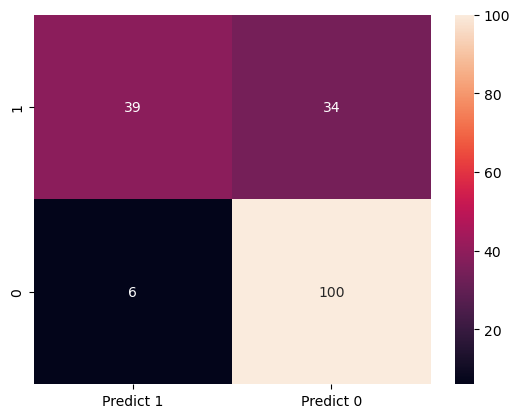

In [115]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_hat1,labels=[1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### K Nearest Neighbours

In [116]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [117]:
knc = KNC(n_neighbors=5)
knc.fit(X_train,y_train.values.ravel())

KNeighborsClassifier()

In [118]:
y_hat = knc.predict(X_test)

In [119]:
print('Accuracy:',accuracy_score(y_test,y_hat))

Accuracy: 0.7877094972067039


In [121]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       106
           1       0.81      0.63      0.71        73

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



<Axes: >

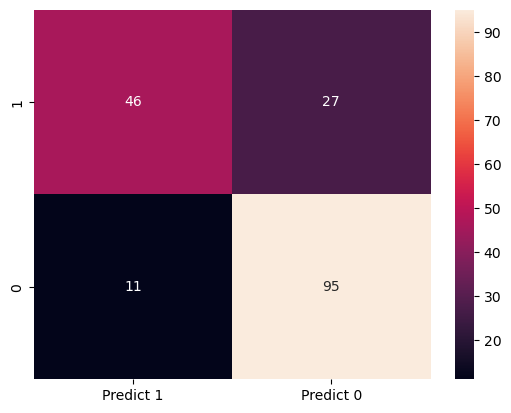

In [122]:
cm = confusion_matrix(y_test,y_hat,labels=[1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### Xgboost

In [124]:
from xgboost import XGBClassifier



/Users/mihirsingh/anaconda3/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [125]:
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

y_hat = xgb.predict(X_test)

/Users/mihirsingh/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:01:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [126]:
print('Accuracy:',accuracy_score(y_test,y_hat))

Accuracy: 0.776536312849162


In [127]:
print(classification_report(y_test,y_hat))


              precision    recall  f1-score   support

           0       0.77      0.89      0.82       106
           1       0.79      0.62      0.69        73

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179



<Axes: >

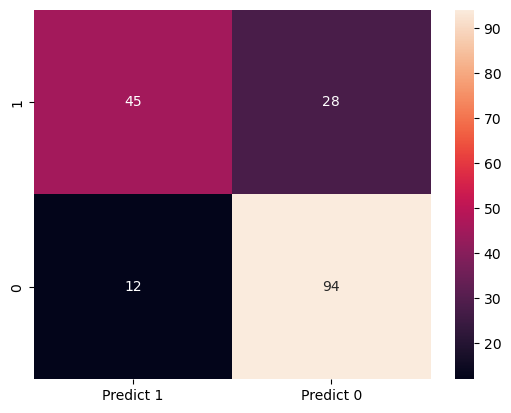

In [129]:
cm = confusion_matrix(y_test,y_hat,labels=[1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### Random Forest


In [130]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [131]:
rfcl = RFC(n_estimators=50,max_depth=5,max_features = 3,random_state=1)

In [132]:
rfcl.fit(X_train,y_train.values.ravel())


RandomForestClassifier(max_depth=5, max_features=3, n_estimators=50,
                       random_state=1)

In [133]:
y_hat = rfcl.predict(X_test)

In [135]:
print('Accuracy: ',accuracy_score(y_hat,y_test))

Accuracy:  0.7932960893854749


<Axes: >

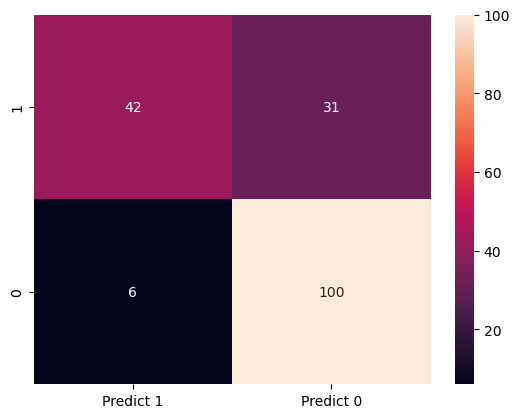

In [136]:
cm = confusion_matrix(y_test,y_hat,labels=[1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### Conclusion

The Random Forest Classifier model works the best. It produced an accuracy of 0.79 on the testing data partition

### Applying the above algorithm on the test data

In [176]:
df_test = pd.read_csv('test.csv')

In [177]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [178]:
#Dropping Columns that have no relevance: Ticket, PassengerId, Cabin and Name
Id = df_test['PassengerId']
df_test.drop(columns = ['Ticket','PassengerId','Name','Cabin'],inplace=True) 
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [179]:
#Dealing with any missing values

for col in df_test.columns:
    val = df_test[col].isnull().sum()
    if val != 0:
        print(col,' has ', val,' null values')

Age  has  86  null values
Fare  has  1  null values


In [180]:
df_test['Age'].fillna(df['Age'].median(),inplace=True)
df_test['Fare'].fillna(df['Fare'].median(),inplace=True)

In [181]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,28.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,28.0,0,0,8.0500,S


In [182]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [183]:
#Dealing with the categorical values

df_test['Sex'] = encoder.fit_transform(df_test['Sex'])
df_test['Embarked'] = encoder.fit_transform(df_test['Embarked'])

In [184]:
df_test = pd.get_dummies(data=df_test,columns=['Embarked'])

In [185]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500,0,0,1
414,1,0,39.0,0,0,108.9000,1,0,0
415,3,1,38.5,0,0,7.2500,0,0,1
416,3,1,28.0,0,0,8.0500,0,0,1


In [186]:
df_test.drop(['Embarked_1'],axis=1,inplace=True)


In [187]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_2
0,3,1,34.5,0,0,7.8292,0,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,0,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500,0,1
414,1,0,39.0,0,0,108.9000,1,0
415,3,1,38.5,0,0,7.2500,0,1
416,3,1,28.0,0,0,8.0500,0,1


In [188]:
X = df_test

Xscaled = scaler.fit_transform(X)

In [189]:
y_pred = rfcl.predict(Xscaled)

In [193]:
Id = Id.to_numpy()

In [202]:
solution = {'PassengerId':Id,'Survived':y_pred}

In [203]:
df_solution = pd.DataFrame(solution)

In [204]:
df_solution

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [205]:
df_solution.to_csv('solution.csv',index=False)